<a href="https://colab.research.google.com/github/skrofman/Applied-Machine-Learning/blob/master/DATA_310_Lecture_22_Spring_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DATA 310  Lecture 22 - Spring 2021



##<font color='navy'> Classification Algorithms</font>

### <font color='red'> Critical Thinking: What is *classification*?</font> What is the difference between <font color='deepskyblue'>*regression*</font> and <font color='forestgreen'>*classification*?</font>

**Regression**: the dependent variable is continuous and we want to predict the expected value given the input features.

**Classification**: the dependent variable is binary or nominal and we want to predict the corect class given the input features.

If we had one input feature as a continuous variable we could ***see*** the classification.

<font color='magenta'>**Example**</font> Let's imagine we have data for the weights of two different animals and we would like to know whether the *weight* alone may be a good predictor for what type of animal there is.

<figure>
<center>
<img src='https://drive.google.com/uc?id=1Ydr5-3uQU7HVDv7aqLQY7V7yPfUun8Wr' 
width='600px' height='550px' />
<figcaption>Weight distributions for squirrels and rabbits</figcaption></center>
</figure>


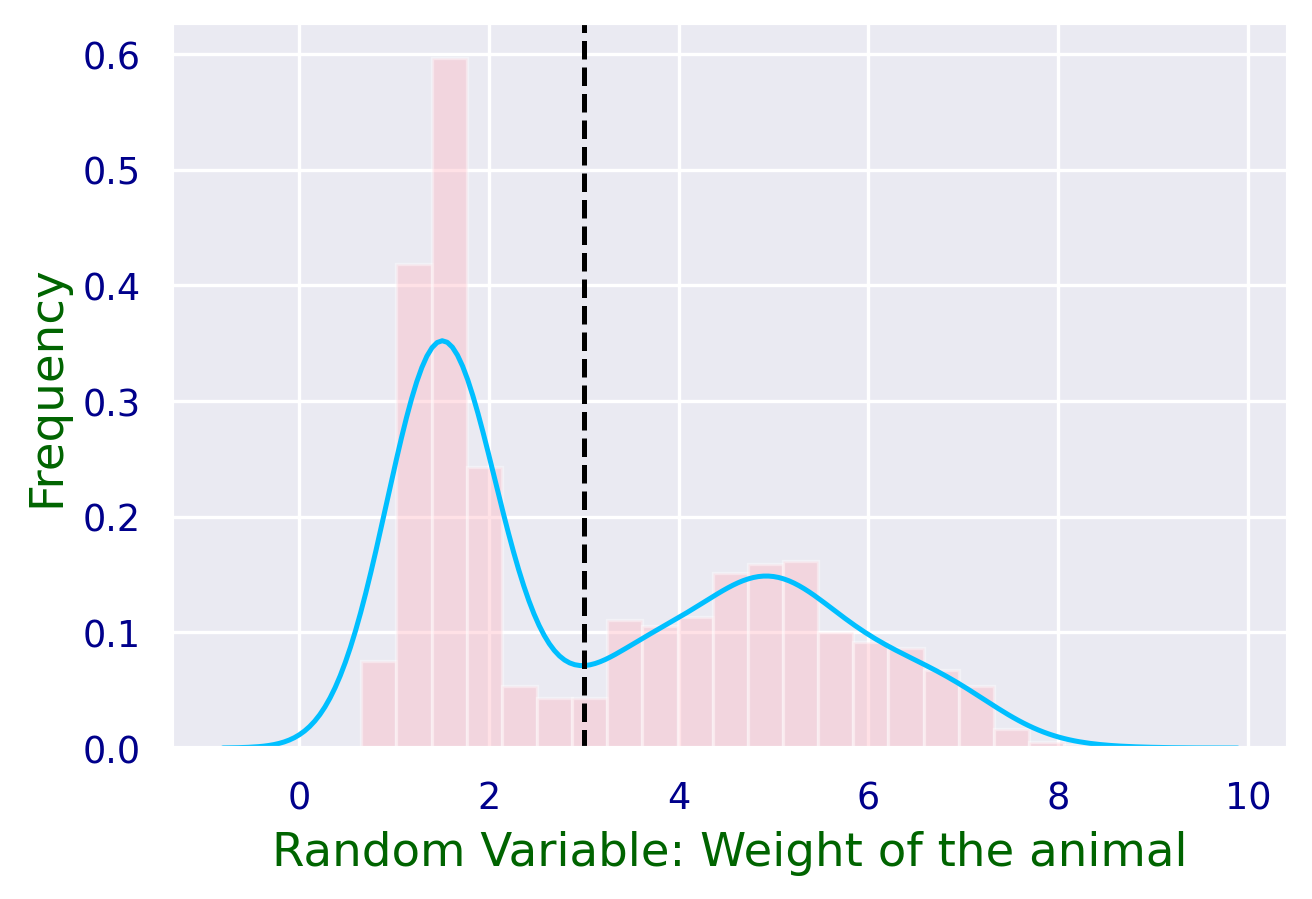

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 120
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import numpy as np
import pandas as pd

# import seaborn: very important to easily plot histograms and density estimations
import seaborn as sns
sns.set(color_codes=True)

from scipy import stats
from scipy.stats import norm
# generate random numbersfrom N(0,1)
plt.figure()
data_weights = np.concatenate((norm.rvs(size=500,loc=1.5,scale=0.3),norm.rvs(size=500,loc=5,scale=1.25)),axis=0)
animal = np.repeat([0,1],500)
# then we want to display the histogram and the fit of the underlying distribution:
ax1 = sns.distplot(data_weights,
                  bins=21,
                  kde=True,
                  color='deepskyblue',
                  hist_kws={"color":'lightpink'},
                  #fit=stats.norm,
                  #fit_kws={"color":'deepskyblue'}
                   )
ax1.set_xlabel('Random Variable: Weight of the animal',fontsize=14,color='darkgreen')
ax1.set_ylabel('Frequency',fontsize=14,color='darkgreen')
l1 = ax1.lines[0]
plt.axvline(x=3.0, color='black',linestyle='dashed')

x = l1.get_xydata()[:,0]
y = l1.get_xydata()[:,1]
plt.tick_params(axis='x', colors='darkblue')
plt.tick_params(axis='y', colors='darkblue')
#ax1.fill_between(x,y, where = x <= 3.0, color='palegreen',alpha=0.5)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression()

In [ ]:
# here we have only one input feature so we need to make it a column vector
model.fit(animal_weights.reshape(-1,1),animal)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# this means the weight for x
model.coef_

array([[4.56558809]])

In [ ]:
# this is beta_0
model.intercept_

array([-11.13377237])

### We want to predict the probability for having a squirrel or a rabbit

In [ ]:
model.predict_proba([[2]])

array([[0.88106939, 0.11893061]])


## what is the meaning of this?

we got that according to the data an animal weghing 2lbs is 88.1% likely to be a squirrel and 11.9% likely to be a rabbit



##<font color='navy'> Logistic Regression </font>
 
 
What we want: classify by using a probability model (an estimate of the odds-ratio) such as a **straight** line or a **sigmoid** curve.

The ***odds-ratio*** is


$$\large
\frac{\mathbb{P}(y_i=1|\text{feature data})}{\mathbb{P}(y_i=0|\text{feature data})}
$$

Classification by a straight line is possible but less desirable (as you can see in the picture.)

The concept of the logistic regression in a multivariate setup is to model the log of the odds ratio as a linear function of the features:

$$\large
\log\left(\frac{\mathbb{P}(y_i=1|\text{features})}{\mathbb{P}(y_i=0|\text{features})} \right) = \beta_0 + \sum\limits_{i=1}^{p} \beta_jx_{ij}
$$

where $y_i$ represents the $i-th$ output (classification) and $x_{ij}$ represent the features of the $i-th$ observation.

Fact:
$$\large
\mathbb{P}(y_i=\text{rabbit}|\text{weight}) + \mathbb{P}(y_i=\text{squirrel}|\text{weight}) = 1
$$

We get 

$$\large
\mathbb{P}(y_i=\text{rabbit}|\text{weight}) = \frac{1}{1+e^{-\beta_0-\beta x_i}}
$$

<figure>
<center>
<img src='https://drive.google.com/uc?id=14lFmIPhJwzsefkYeCJaV_yPitZsCn9GB' 
width='600px' />
<figcaption>Different types of Odds Ratio estimates</figcaption></center>
</figure>



/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/links.py:190: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


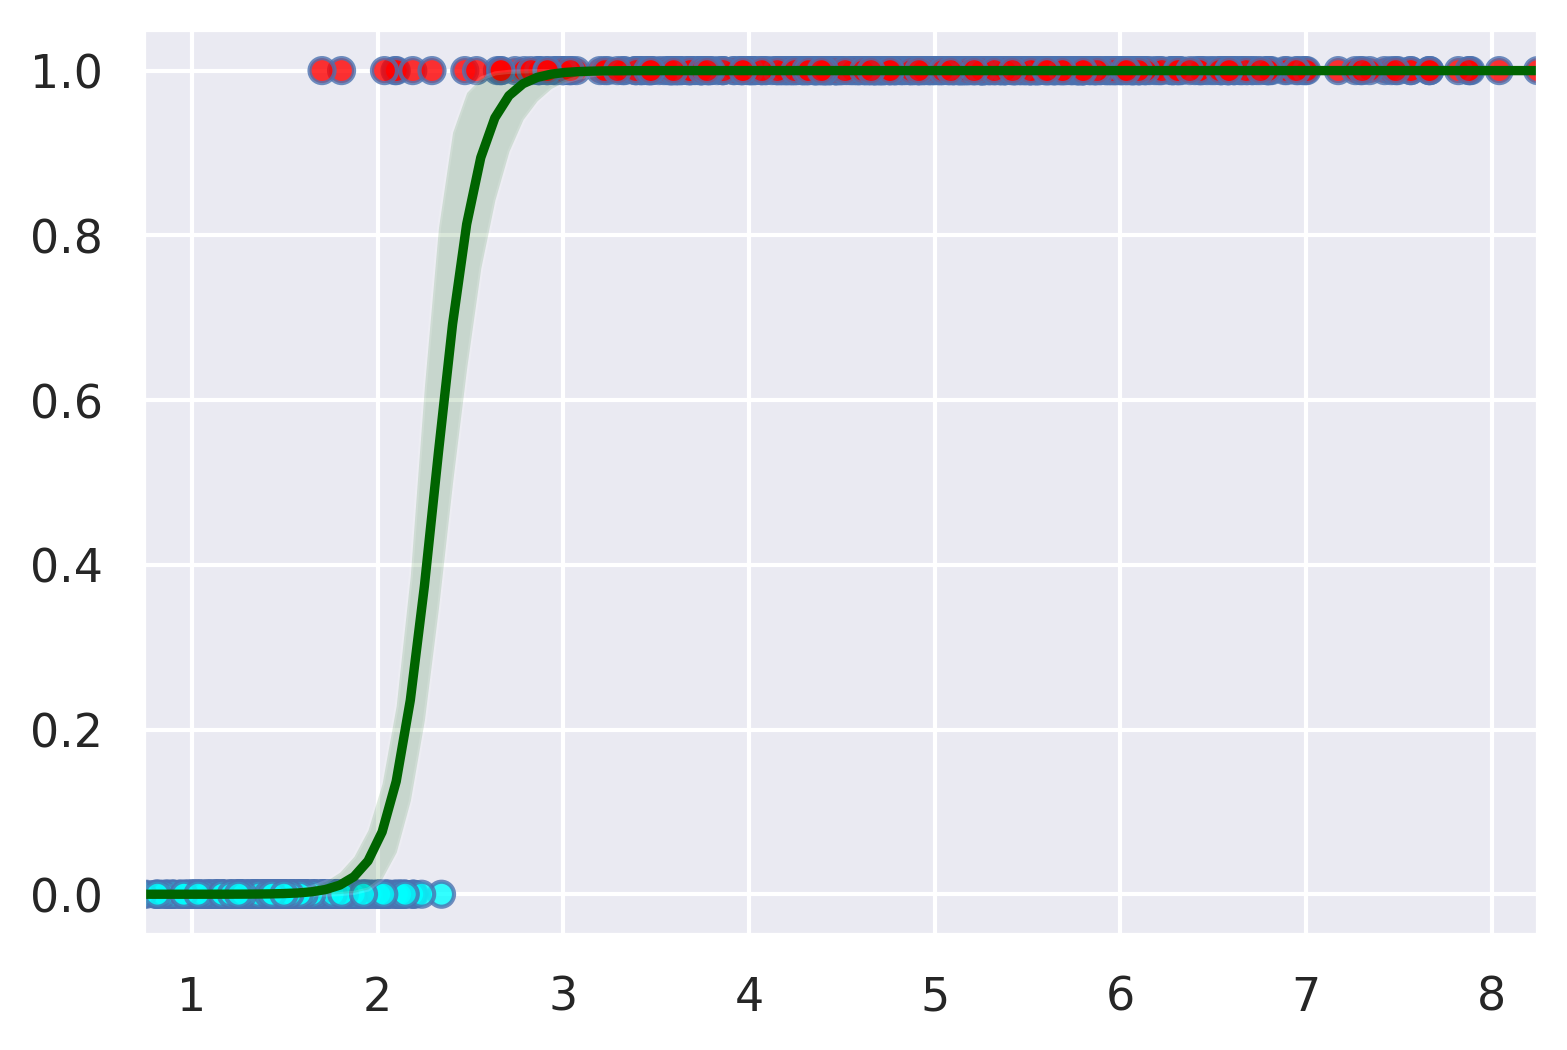

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
mpl.rcParams['figure.dpi'] = 150
np.seterr(divide='ignore', invalid='ignore')

sns.regplot(data_weights, animal, logistic=True,line_kws={'color': 'darkgreen'},scatter_kws={'facecolors':np.where( animal==0 , 'cyan', 'red')})

##<font color='navy'> Example with 2 input features </font>

The separation of the classes can be visualized in 2D.

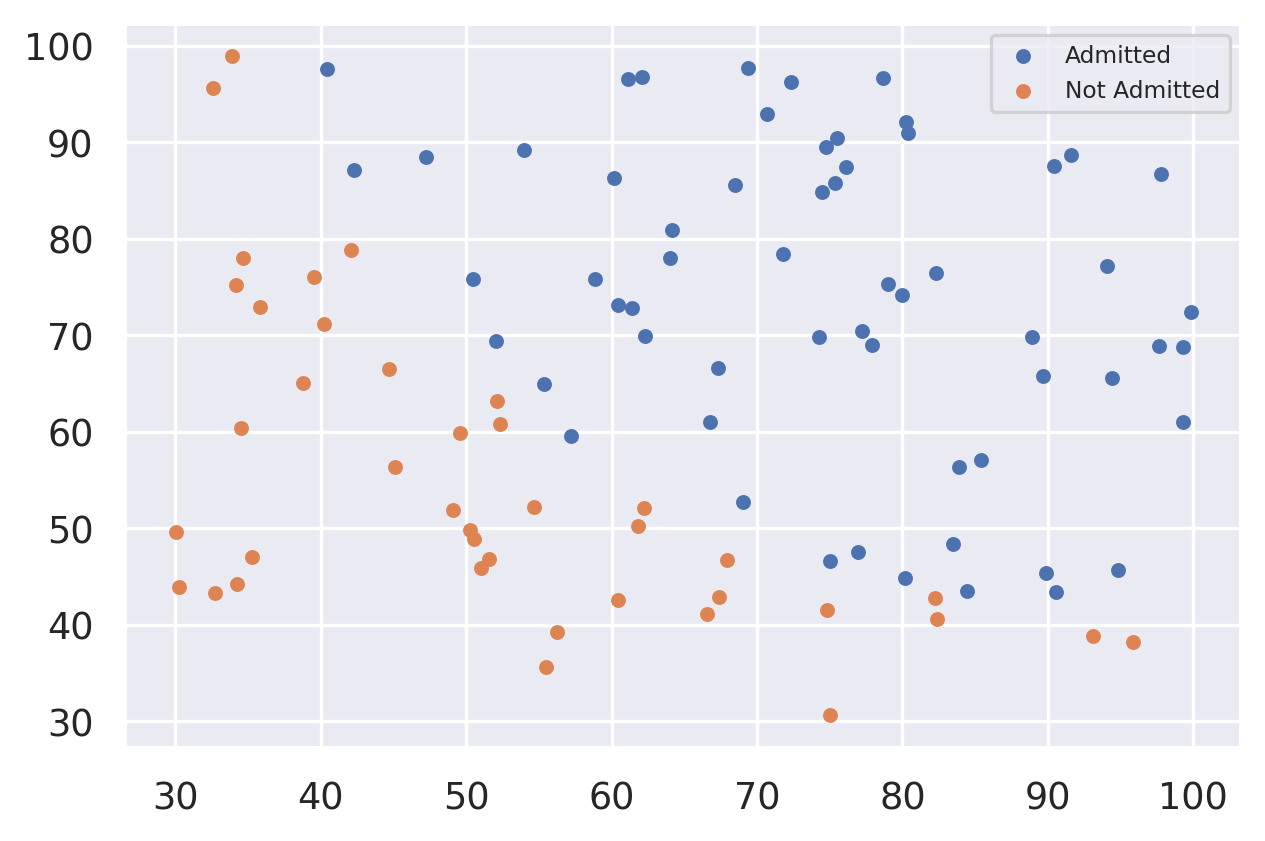

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
mpl.rcParams['figure.dpi'] = 120


from matplotlib.colors import ListedColormap
from sklearn.metrics import accuracy_score


# function definitions
def load_data(path, header):
    marks_df = pd.read_csv(path, header=header)
    return marks_df

# load the data from the file
data = load_data("drive/MyDrive/Data Sets/example_data_classification.csv", None)

# X = feature values, all the columns except the last column
X = data.iloc[:, :-1]

# y = target values, last column of the data frame
y = data.iloc[:, -1]

# filter out the applicants that got admitted
admitted = data.loc[y == 1]

# filter out the applicants that din't get admission
not_admitted = data.loc[y == 0]

# plots
plt.scatter(admitted.iloc[:, 0], admitted.iloc[:, 1], s=12, label='Admitted')
plt.scatter(not_admitted.iloc[:, 0], not_admitted.iloc[:, 1], s=12, label='Not Admitted')
plt.legend(fontsize=7)
plt.show()

In [ ]:
model = LogisticRegression(solver='lbfgs')
model.fit(X, y)
predicted_classes = model.predict(X)
accuracy = accuracy_score(y,predicted_classes)
print(model.coef_)
print(model.intercept_)
print(accuracy)

[[0.20535491 0.2005838 ]]
[-25.05219314]
0.89


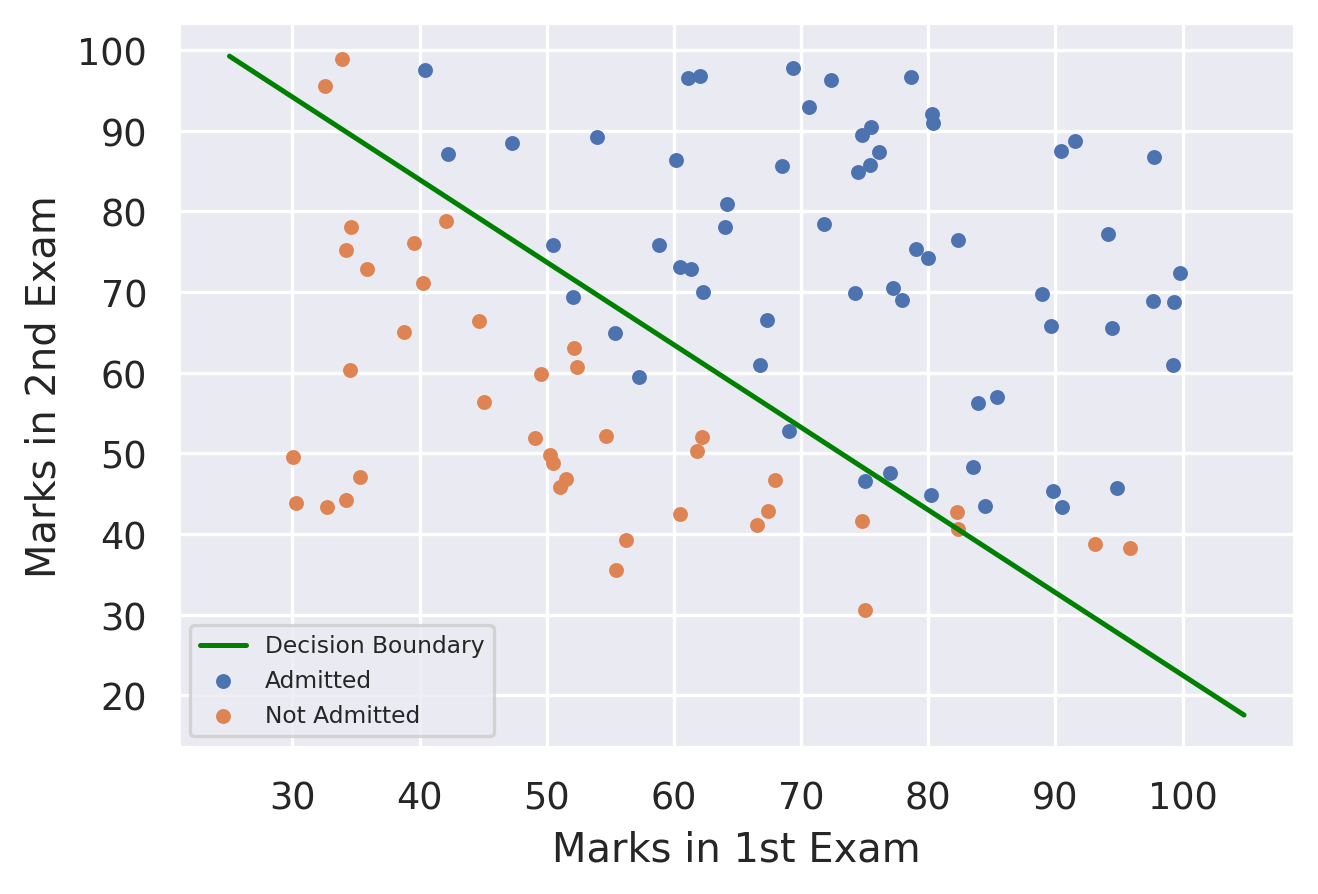

In [ ]:
x_values = [np.min(X.values[:, 0] - 5), np.max(X.values[:, 0] + 5)]
y_values = - (model.intercept_ + model.coef_[:,0]*x_values) / model.coef_[:,1]

plt.scatter(admitted.iloc[:, 0], admitted.iloc[:, 1], s=12, label='Admitted')
plt.scatter(not_admitted.iloc[:, 0], not_admitted.iloc[:, 1], s=12, label='Not Admitted')
plt.plot(x_values, y_values, label='Decision Boundary',color='green')
plt.xlabel('Marks in 1st Exam')
plt.ylabel('Marks in 2nd Exam')
plt.legend(fontsize=7)
plt.show()

In [ ]:
# We want to predict for a new student the probability of admission:
p = model.predict_proba([[72,89]]) # this student was admitted


In [ ]:
# The probability that the student was not admitted
p[:,0]

array([0.00050759])

In [ ]:
# The probability the student was admitted
p[:,1]

array([0.99949241])

In [ ]:
sum(p[0,:])

1.0

##K-Nearest Neighbors Algorithm
###<font color='red'> Big Idea: The proximity is very important.</font>

<font color='blue'> The classification is decided by the votes of the $k$-nearest neighbors, an odd natural number such as $2p+1$. 

<font color='forestgreen'> The votes can be weighted (if we want) by the inverse of the Euclidean distance.</font>

